<a href="https://colab.research.google.com/github/shahdelmasry12/Data-Mining-Project/blob/main/Bank_Marketing_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Data**

In [42]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [43]:
url = "https://raw.githubusercontent.com/shahdelmasry12/Data-Mining-Project/refs/heads/main/bank.csv"
df = pd.read_csv(url)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# **Cleaning data**

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [45]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [46]:
df.duplicated().sum()

np.int64(0)

In [49]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


deposit
no     0.52616
yes    0.47384
Name: proportion, dtype: float64


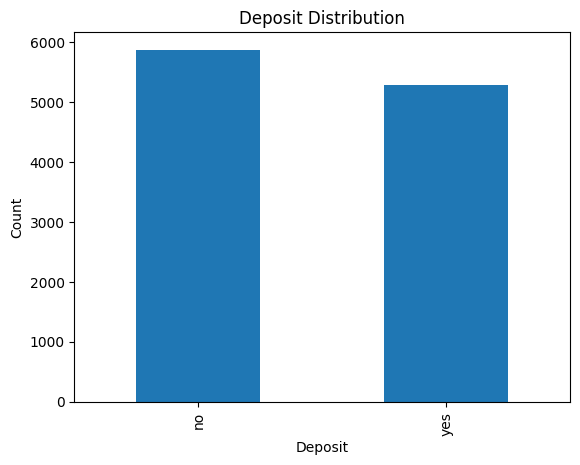

In [52]:
# Calculate the percentage for each  deposit value
print(df.deposit.value_counts(normalize=True))
df["deposit"].value_counts().plot(kind="bar")
plt.title("Deposit Distribution")
plt.xlabel("Deposit")
plt.ylabel("Count")
plt.show()

# **Data Visualization**

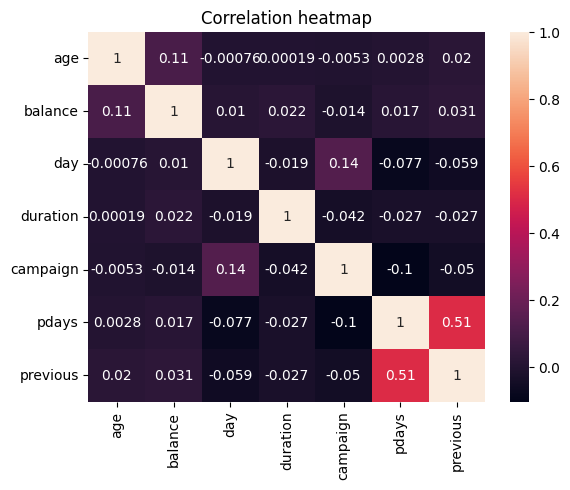

In [53]:
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True)
plt.title("Correlation heatmap")
plt.show()

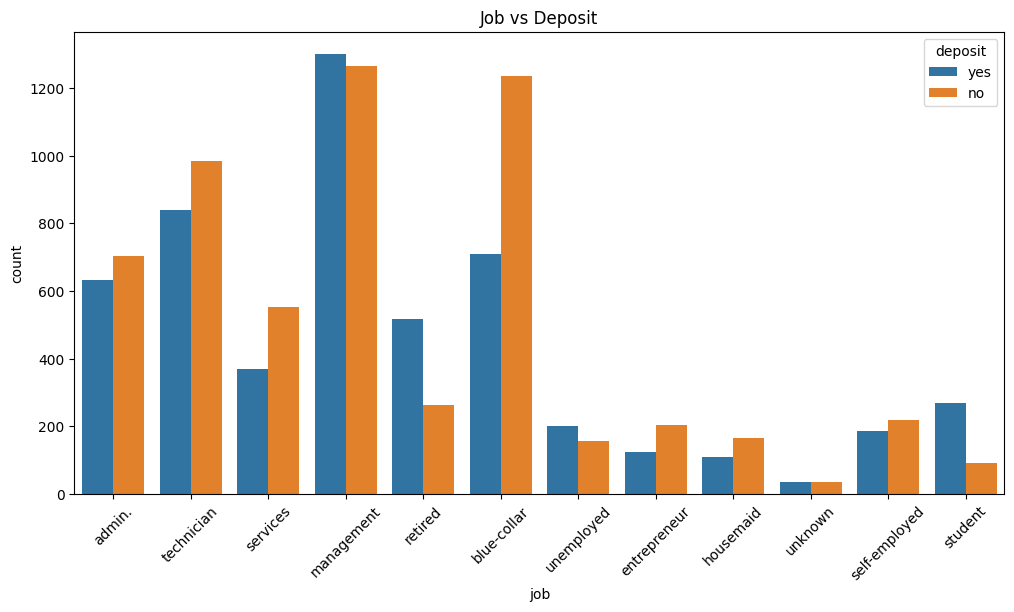

In [55]:
plt.figure(figsize=(12, 6))
sns.countplot(x="job", hue="deposit", data=df)
plt.title("Job vs Deposit")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Education vs Deposit')

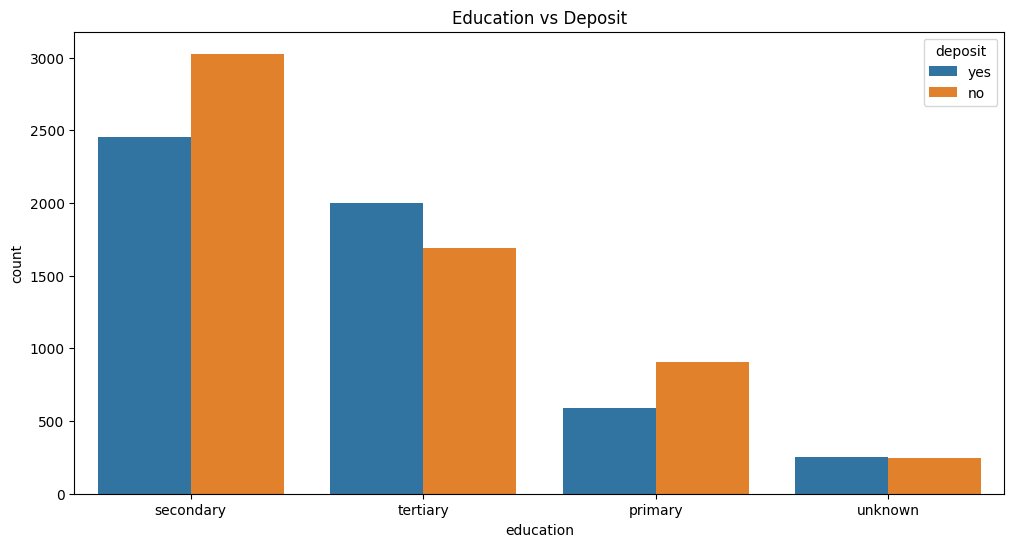

In [56]:
# education vs deposit
plt.figure(figsize=(12, 6))
sns.countplot(x="education", hue="deposit", data=df)
plt.title("Education vs Deposit")

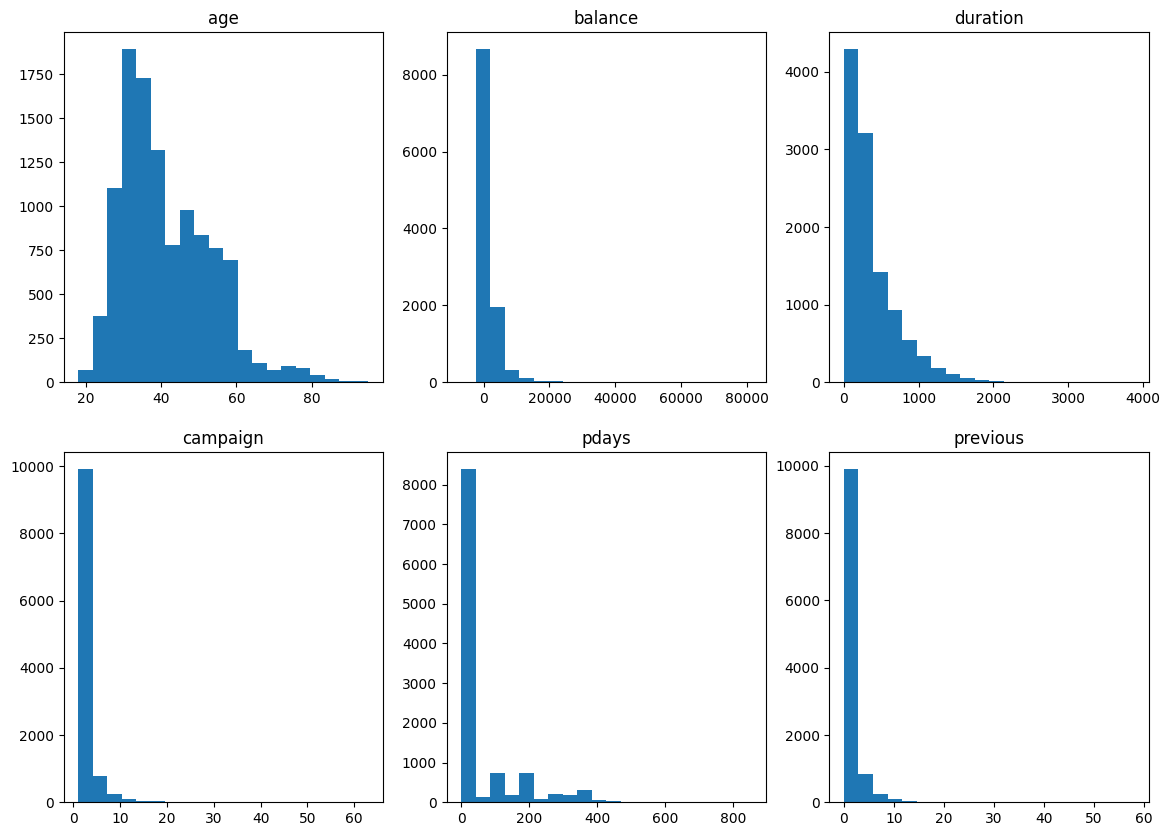

In [58]:
cols = ["age", "balance", "duration", "campaign", "pdays", "previous"]

plt.figure(figsize=(14, 10))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[col], bins=20)
    plt.title(col)


plt.show()

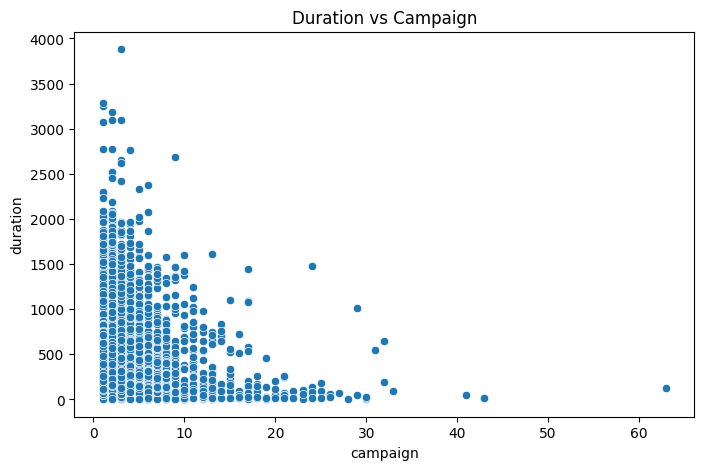

In [59]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="campaign", y="duration", data=df)
plt.title("Duration vs Campaign")
plt.show()

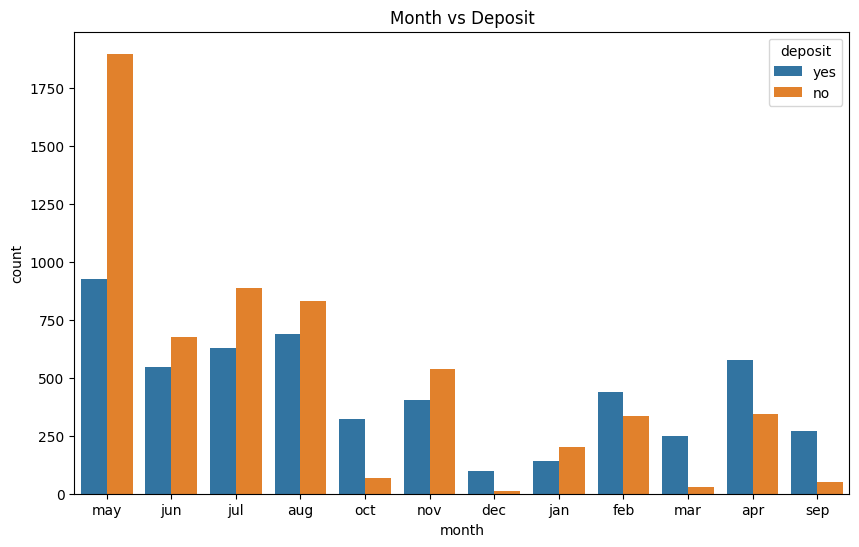

In [60]:
plt.figure(figsize=(10,6))
sns.countplot(x="month", hue="deposit", data=df)
plt.title("Month vs Deposit")
plt.show()

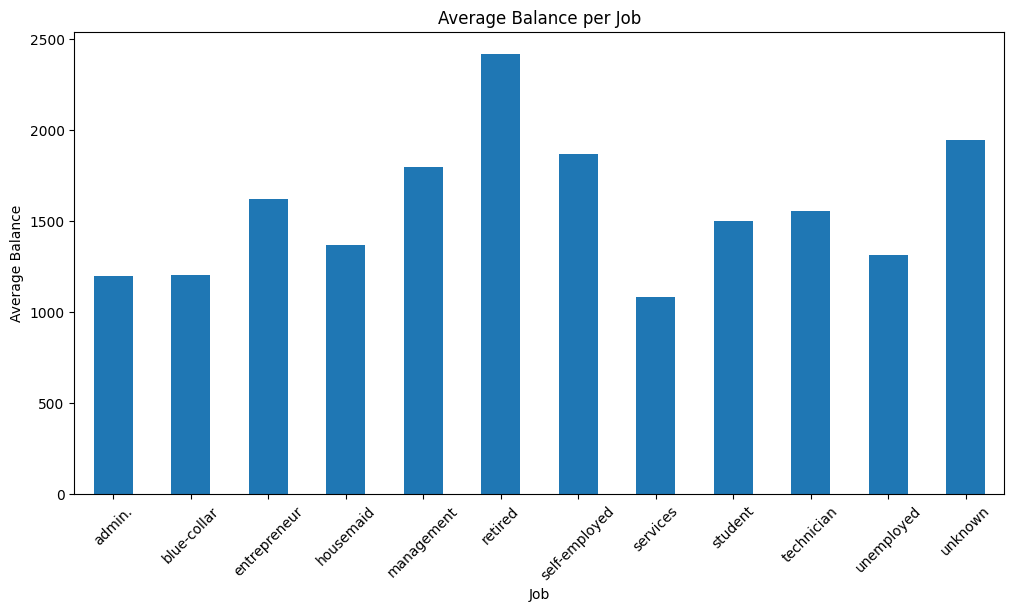

In [61]:
plt.figure(figsize=(12,6))
job_balance = df.groupby('job')['balance'].mean()
job_balance.plot(kind="bar")

plt.title("Average Balance per Job")
plt.xlabel("Job")
plt.ylabel("Average Balance")
plt.xticks(rotation=45)
plt.show()

In [62]:
cols = ["age", "balance", "duration", "campaign", "pdays", "previous"]

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]

    print(f"{col}: {len(outliers)} outliers")

age: 171 outliers
balance: 1055 outliers
duration: 636 outliers
campaign: 601 outliers
pdays: 2750 outliers
previous: 1258 outliers


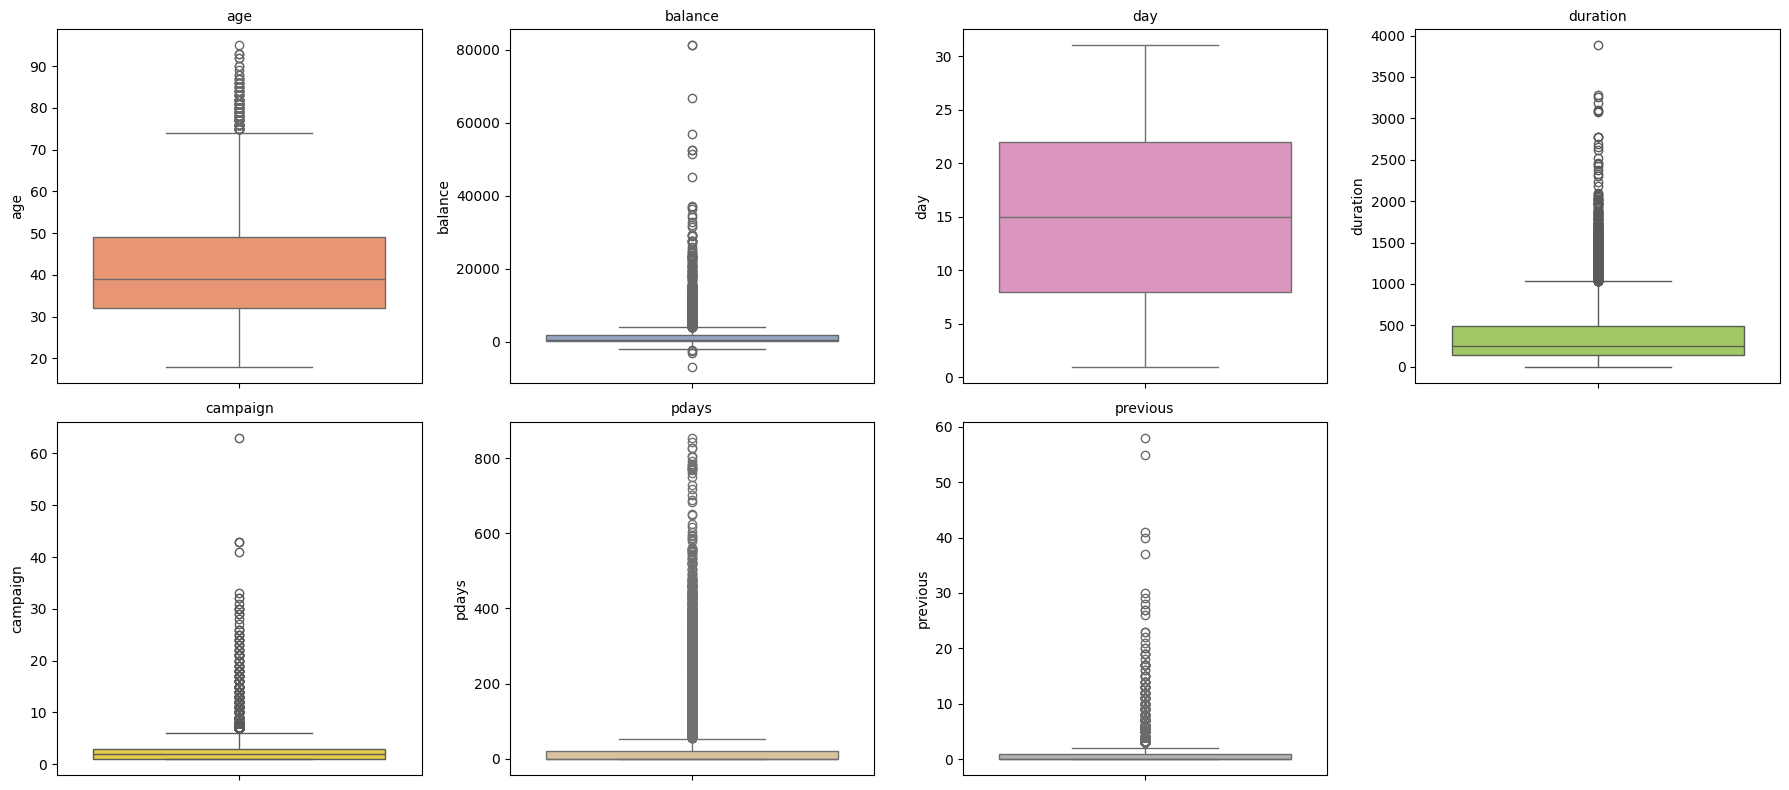

In [65]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(18, 8))
rows = 2
cols = (len(numeric_cols) + 1) // 2

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df[col], color=sns.color_palette("Set2")[i % 8])
    plt.title(col, fontsize=10)

plt.tight_layout()
plt.show()


In [66]:
df.drop(['pdays'],axis=1,inplace=True)

In [67]:
def cap_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

cols_to_cap = ["age","balance", "duration", "campaign", "previous"]

for col in cols_to_cap:
    cap_outliers(col)

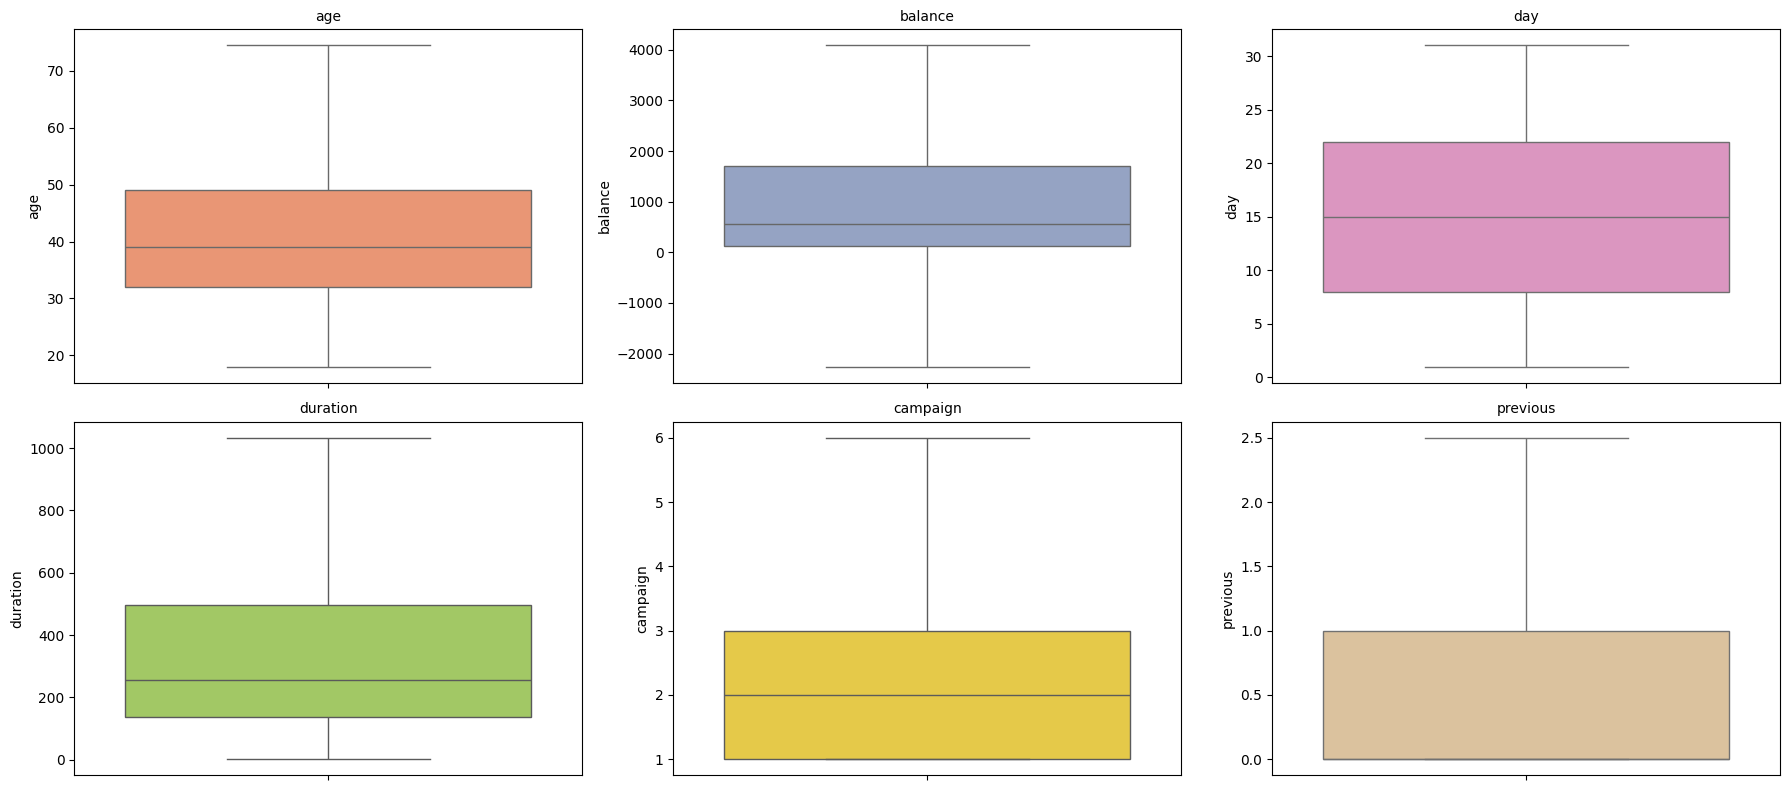

In [68]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(18, 8))
rows = 2
cols = (len(numeric_cols) + 1) // 2

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df[col], color=sns.color_palette("Set2")[i % 8])
    plt.title(col, fontsize=10)

plt.tight_layout()
plt.show()

**Preprocessing**

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11162 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11162 non-null  object 
 3   education  11162 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  previous   11162 non-null  float64
 14  poutcome   11162 non-null  object 
 15  deposit    11162 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 1.4+ MB


In [73]:
# Convert target 'deposit' values ​​to 0 and 1
df['deposit'] = df['deposit'].map({'no': 0, 'yes': 1})

In [74]:
df.head().T

,0,1,2,3,4
age,59.0,56.0,41.0,55.0,54.0
job,admin.,admin.,technician,services,admin.
marital,married,married,married,married,married
education,secondary,secondary,secondary,secondary,tertiary
default,no,no,no,no,no
balance,2343,45,1270,2476,184
housing,yes,no,yes,yes,no
loan,no,no,no,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [75]:
# Separate features and target variable
x = df.drop("deposit", axis=1)
y = df["deposit"]

x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1033,1,0.0,unknown
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1033,1,0.0,unknown
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1033,1,0.0,unknown
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,0.0,unknown
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,0.0,unknown


In [76]:
print(y)

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64


In [77]:
# Identify categorical and numerical columns
categorical_cols = x.select_dtypes(include="object").columns
numerical_cols = x.select_dtypes(include=np.number).columns

print(categorical_cols,"""
*********************************************************************
""",numerical_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object') 
*********************************************************************
 Index(['age', 'balance', 'day', 'duration', 'campaign', 'previous'], dtype='object')


In [78]:
# Convert categorical columns to numerical columns
for col in categorical_cols:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])
x.head().T

,0,1,2,3,4
age,59.0,56.0,41.0,55.0,54.0
job,0.0,0.0,9.0,7.0,0.0
marital,1.0,1.0,1.0,1.0,1.0
education,1.0,1.0,1.0,1.0,2.0
default,0.0,0.0,0.0,0.0,0.0
balance,2343.0,45.0,1270.0,2476.0,184.0
housing,1.0,0.0,1.0,1.0,0.0
loan,0.0,0.0,0.0,0.0,0.0
contact,2.0,2.0,2.0,2.0,2.0
day,5.0,5.0,5.0,5.0,5.0


In [80]:
ros = RandomOverSampler(random_state=42)
x_oversampled, y_oversampled = ros.fit_resample(x, y)

print("Class distribution after Random Oversampling:")
print(np.bincount(y_oversampled))

Class distribution after Random Oversampling:
[5873 5873]


In [81]:
print(y_oversampled.value_counts())

deposit
1    5873
0    5873
Name: count, dtype: int64


In [82]:
x_train, x_test, y_train, y_test = train_test_split(x_oversampled, y_oversampled, test_size=0.3, random_state=42)

print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)

Training set shape: (8222, 15)
Testing set shape: (3524, 15)


# **Algorithm**

In [83]:
#knn Algorithm
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)

print("KNN Accuracy:", accuracy_score(y_test, knn_model.predict(X_test)))

KNN Accuracy: 0.7908626560726447


In [84]:
#Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_model.predict(X_test)))

Decision Tree Accuracy: 0.8127128263337117


In [85]:
df_apriori = df.copy()
df_apriori['age_bin'] = pd.cut(df['age'], bins=[0, 30, 45, 60, 100], labels=['Young', 'Middle-aged', 'Senior', 'Old'])
df_apriori['balance_bin'] = pd.cut(df['balance'], bins=[-np.inf, 0, 1000, 5000, np.inf], labels=['Negative/Zero', 'Low', 'Medium', 'High'])
df_apriori['duration_bin'] = pd.qcut(df['duration'], q=3, labels=['Short', 'Medium', 'Long'])
cols_to_use = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome', 'deposit', 'age_bin', 'balance_bin', 'duration_bin']
df_final = df_apriori[cols_to_use]

print("Data is ready for Apriori. Shape:", df_final.shape)
df_final.head()

Data is ready for Apriori. Shape: (11162, 11)


,job,marital,education,housing,loan,contact,poutcome,deposit,age_bin,balance_bin,duration_bin
0,admin.,married,secondary,yes,no,unknown,unknown,1,Senior,Medium,Long
1,admin.,married,secondary,no,no,unknown,unknown,1,Senior,Low,Long
2,technician,married,secondary,yes,no,unknown,unknown,1,Middle-aged,Medium,Long
3,services,married,secondary,yes,no,unknown,unknown,1,Senior,Medium,Long
4,admin.,married,tertiary,no,no,unknown,unknown,1,Senior,Low,Long


In [86]:

from itertools import combinations

def get_apriori_rules(df, min_support=0.1, min_confidence=0.5):
    transactions = []
    for _, row in df.iterrows():
        transactions.append(set([f"{col}={row[col]}" for col in df.columns]))

    n = len(transactions)
    item_counts = {}
    for t in transactions:
        for item in t:
            item_counts[item] = item_counts.get(item, 0) + 1
    freq_items = {i: c for i, c in item_counts.items() if (c/n) >= min_support}
    rules = []
    for pair in combinations(sorted(freq_items.keys()), 2):
        count_both = sum(1 for t in transactions if pair[0] in t and pair[1] in t)
        support = count_both / n

        if support >= min_support:
            conf1 = count_both / freq_items[pair[0]]
            lift1 = support / ((freq_items[pair[0]]/n) * (freq_items[pair[1]]/n))
            if conf1 >= min_confidence:
                rules.append({'Antecedent': pair[0], 'Consequent': pair[1], 'Support': support, 'Confidence': conf1, 'Lift': lift1})
            conf2 = count_both / freq_items[pair[1]]
            lift2 = support / ((freq_items[pair[0]]/n) * (freq_items[pair[1]]/n))
            if conf2 >= min_confidence:
                rules.append({'Antecedent': pair[1], 'Consequent': pair[0], 'Support': support, 'Confidence': conf2, 'Lift': lift2})

    return pd.DataFrame(rules)
all_rules = get_apriori_rules(df_final)
print(f"Generated {len(all_rules)} rules.")

Generated 159 rules.


In [87]:

deposit_rules = all_rules[all_rules['Consequent'] == 'deposit=yes'].sort_values(by='Lift', ascending=False)

print("--- Top Rules Predicting 'deposit=yes' ---")
if not deposit_rules.empty:
    display(deposit_rules.head(10))
else:
    print("No rules found for deposit=yes with the current support/confidence.")
print("\n--- Top General Association Rules ---")
display(all_rules.sort_values(by='Lift', ascending=False).head(10))

--- Top Rules Predicting 'deposit=yes' ---
No rules found for deposit=yes with the current support/confidence.

--- Top General Association Rules ---


,Antecedent,Consequent,Support,Confidence,Lift
127,job=management,education=tertiary,0.195126,0.848792,2.568234
126,education=tertiary,job=management,0.195126,0.590404,2.568234
26,age_bin=Young,marital=single,0.136803,0.760837,2.414003
96,duration_bin=Long,deposit=1,0.260348,0.780973,1.648179
95,deposit=1,duration_bin=Long,0.260348,0.549442,1.648179
83,duration_bin=Short,deposit=0,0.278176,0.829992,1.577451
82,deposit=0,duration_bin=Short,0.278176,0.528691,1.577451
77,contact=unknown,housing=yes,0.151317,0.719949,1.521695
75,contact=unknown,deposit=0,0.162695,0.774084,1.471194
138,job=blue-collar,housing=yes,0.118348,0.679527,1.436258
